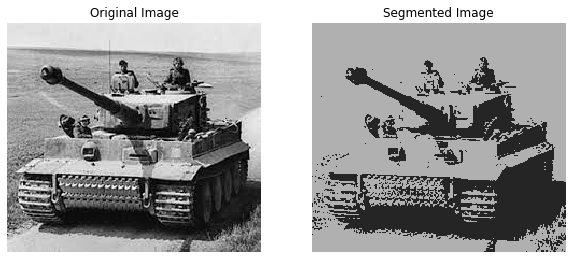

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.mixture import GaussianMixture

# Load the image
image = io.imread('Tank.jpg')  # Replace 'your_image.jpg' with the image file path

# Get the dimensions of the image
height, width, _ = image.shape

# Reshape the image into a data matrix where each row represents a pixel's RGB values
data = image.reshape(-1, 3)

# Create a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, random_state=0)

# Fit the GMM to the pixel data
gmm.fit(data)

# Predict the cluster assignments for each pixel
cluster_assignments = gmm.predict(data)

# Get the cluster means (mean colors)
cluster_means = gmm.means_

# Replace pixel values in the image with cluster mean colors
segmented_image = cluster_means[cluster_assignments].reshape(height, width, 3).astype(np.uint8)

# Display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')
plt.subplot(122)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')
plt.show()